In [38]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()

In [39]:
features = pd.DataFrame(
    data=diabetes.data,
    columns=diabetes.feature_names)

target = diabetes.target

In [40]:
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


<Axes: ylabel='Frequency'>

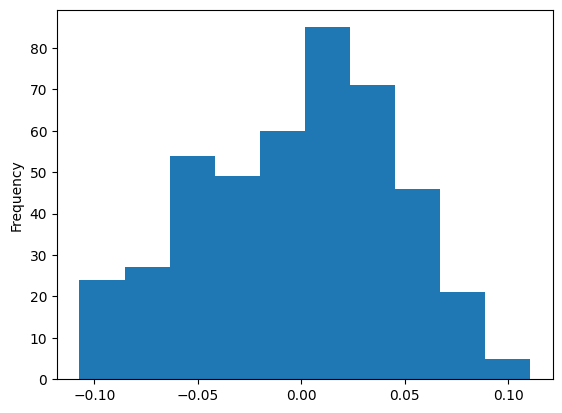

In [42]:
features['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

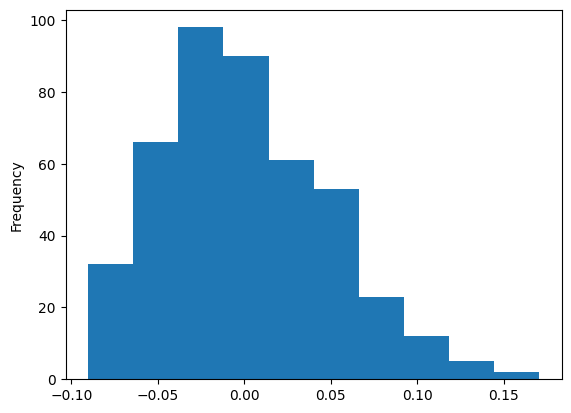

In [43]:
features['bmi'].plot(kind='hist')

#Looks like this data is allready normalized

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353, 89, 353, 89)

In [55]:
np.mean(y_train), np.median(y_train)

(153.73654390934846, 142.0)

In [47]:
tf.random.set_seed(42)

In [63]:
model_1 = tf.keras.Sequential(name='model_1')
model_1.add(tf.keras.layers.Dense(128))
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 59.5984 - mae: 59.5984


[59.598358154296875, 59.598358154296875]

In [64]:
model_2 = tf.keras.Sequential(name='model_2')
model_2.add(tf.keras.layers.Dense(128))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

model_2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 49.9351 - mae: 49.9351


[49.93509292602539, 49.93509292602539]

In [87]:
model_3 = tf.keras.Sequential(name='model_3')
model_3.add(tf.keras.layers.Dense(128))
model_3.add(tf.keras.layers.Dense(50))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(0.002),metrics=['mae'])

history = model_3.fit(X_train, y_train, epochs=40, verbose=0)

model_3.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 43.2896 - mae: 43.2896


[43.28958511352539, 43.289581298828125]

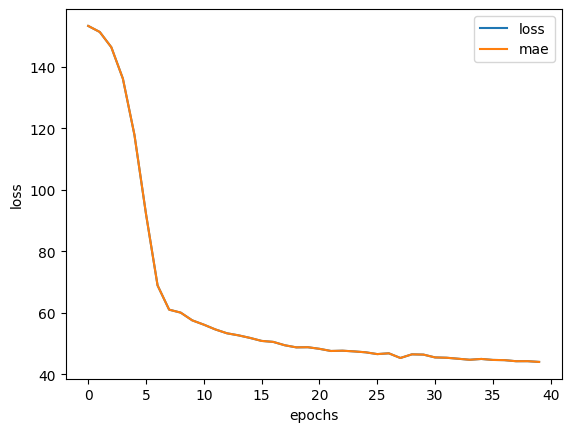

In [88]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [89]:
y_pred = model_3.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [108]:
tf.squeeze(y_pred) - y_test

<tf.Tensor: shape=(89,), dtype=float32, numpy=
array([ -79.245224  ,  107.30971   ,  -68.65839   ,   63.634033  ,
         12.6838    ,   12.848938  ,   -4.6136017 ,  -87.97545   ,
         -5.6216736 ,   13.263145  ,   -0.45828247,  -95.39682   ,
        -31.017937  ,  -85.2831    ,  -26.315475  ,   68.688416  ,
        -76.97966   ,  -19.046707  ,   25.798859  ,  -64.166306  ,
       -116.88301   ,   24.507385  ,  -49.93112   ,  -45.40004   ,
         19.12741   ,   48.977615  ,  -78.312195  ,  104.79031   ,
          3.696106  ,    9.846481  ,   35.51657   ,  -17.85926   ,
         36.81598   ,   20.255112  ,   -8.57135   ,  -56.58287   ,
         85.33979   ,   39.75968   ,  -14.243149  ,   -2.0273972 ,
         40.2147    ,    6.031418  ,    4.442215  ,   -8.059418  ,
         84.73825   ,   10.737652  , -116.531265  ,   20.632423  ,
        -22.840218  , -109.30774   ,   11.777863  ,  -93.4912    ,
         48.13926   ,   40.294678  ,   -3.503952  ,   53.120926  ,
         28.675